In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Read Data ####

In [2]:
bmarket= pd.read_csv("Data/bank.csv")

In [3]:
bmarket.shape

(11162, 17)

In [4]:
bmarket.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
bmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### Univaraiate Analysis ####

In [6]:
bmarket[['age']].describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


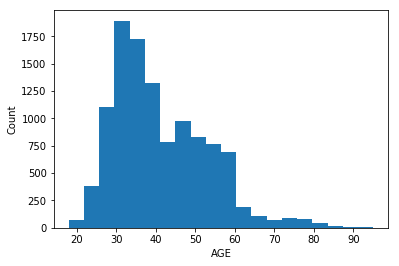

In [7]:
plt.hist(bmarket.age,bins=20)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

In [8]:
bmarket[['duration']].describe()

,duration
count,11162.000000
mean,371.993818
std,347.128386
min,2.000000
25%,138.000000
50%,255.000000
75%,496.000000
max,3881.000000


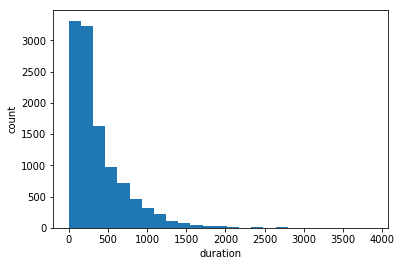

In [9]:
plt.hist(bmarket.duration,bins=25)
plt.xlabel('duration')
plt.ylabel('count')
plt.show()

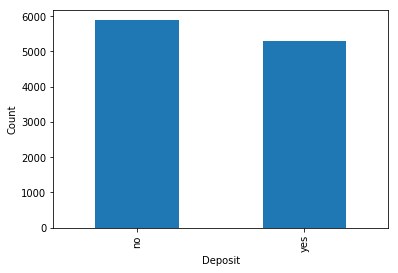

In [10]:
bmarket.deposit.value_counts().plot(kind="bar")
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.show()

#### Bi-Variate Analysis ####

In [11]:
##summary statistics for continuous vs categorical values##
bmarket.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


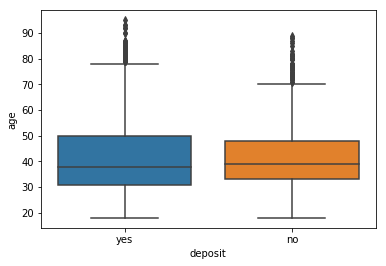

In [12]:
sns.boxplot(x='deposit',y='age',data=bmarket)
plt.show()

In [13]:
bmarket=bmarket.drop('balance',axis=1)


In [14]:
pd.crosstab(bmarket.deposit,bmarket.job,margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
deposit,,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36,5873
yes,631,708,123,109,1301,516,187,369,269,840,202,34,5289
All,1334,1944,328,274,2566,778,405,923,360,1823,357,70,11162


In [15]:
pd.crosstab(bmarket.deposit,bmarket.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


In [16]:
pd.crosstab(bmarket.deposit,bmarket.marital,margins=True)

marital,divorced,married,single,All
deposit,,,,
no,671,3596,1606,5873
yes,622,2755,1912,5289
All,1293,6351,3518,11162


In [17]:
pd.crosstab(bmarket.deposit,bmarket.education)

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


In [18]:
pd.crosstab([bmarket.education,bmarket.marital],bmarket.deposit,margins=True)

deposit               no   yes    All
education marital                    
primary   divorced   100   104    204
          married    703   396   1099
          single     106    91    197
secondary divorced   361   291    652
          married   1816  1304   3120
          single     849   855   1704
tertiary  divorced   183   203    386
          married    930   913   1843
          single     580   880   1460
unknown   divorced    27    24     51
          married    147   142    289
          single      71    86    157
All                 5873  5289  11162

In [19]:
pd.crosstab([bmarket.marital,bmarket.job],bmarket.deposit,margins=True)

deposit                   no   yes    All
marital  job                             
divorced admin.           92    90    182
         blue-collar      91    58    149
         entrepreneur     27    15     42
         housemaid        28    18     46
         management      146   142    288
         retired          50   121    171
         self-employed    17    22     39
         services         71    50    121
         student           1     1      2
         technician      127    77    204
         unemployed       20    27     47
         unknown           1     1      2
married  admin.          371   306    677
         blue-collar     898   437   1335
         entrepreneur    153    81    234
         housemaid       123    67    190
         management      747   681   1428
         retired         199   382    581
         self-employed   143    79    222
         services        326   178    504
         student           5    10     15
         technician      514   416    930
         unemployed       89    97    186
         unknown          28    21     49
single   admin.          240   235    475
         blue-collar     247   213    460
         entrepreneur     25    27     52
         housemaid        14    24     38
         management      372   478    850
         retired          13    13     26
         self-employed    58    86    144
         services        157   141    298
         student          85   258    343
         technician      342   347    689
         unemployed       46    78    124
         unknown           7    12     19
All                     5873  5289  11162

In [20]:
##dummy variable creation##(when we start with the algorithm)

cat_col = bmarket.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(bmarket[cat_col],prefix= cat_col,drop_first=True)
bmarket.drop(cat_col,axis=1,inplace=True)
X= pd.concat([bmarket,dummies],axis=1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
age                    11162 non-null int64
day                    11162 non-null int64
duration               11162 non-null int64
campaign               11162 non-null int64
pdays                  11162 non-null int64
previous               11162 non-null int64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
job_unknown            11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_secondary    11162 non-null uint8
education_t

In [22]:
##divide the data into train and set##
Y= X["deposit_yes"]
X= X.drop("deposit_yes",axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3,random_state=2)

In [24]:
X_train.drop('duration',axis=1,inplace=True)
X_test.drop('duration',axis=1,inplace=True)

/home/nikitha/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
##feeding data to the ML algorithm## ##start training the algorithm##
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)

/home/nikitha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
## analysisng the error through metrics, must be 0##
from sklearn import metrics
metrics.log_loss(Y_test,Y_pred)

10.024466327697555

In [27]:
## must be as close to 1 as possible, ranges from 0 to 1 ##
metrics.accuracy_score(Y_test,Y_pred)


0.709764108689161

### Decision  Trees ###

In [28]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(max_depth=20)
DT.fit(X_train,Y_train)
Y_pred= DT.predict(X_test)

In [29]:
metrics.accuracy_score(Y_test,Y_pred)

0.6676619886533294

### Random Forests ###

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=150)
forest.fit(X_train,Y_train)
Y_pred= forest.predict(X_test)

In [31]:
metrics.accuracy_score(Y_test,Y_pred)

0.7223051657211108


### KNN ###

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [33]:
metrics.accuracy_score(Y_test,Y_pred)

0.6607942669453568

### PCA dimensionality reduction(unsupervised learning) ###

In [46]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
##fit- to learn, transform=to change##
X_reduced_train= pca.fit_transform(X_train)
X_reduced_test=pca.transform(X_test)


In [45]:
var= pca.explained_variance_ratio_
print(var)

[9.80678983e-01 1.21116700e-02 5.98687343e-03 6.48695697e-04
 3.06907122e-04]


In [47]:
X_reduced_train


array([[-51.9599999 ,  -4.44682243],
       [-51.89416537, -14.28354943],
       [-51.84342326,  -6.15035527],
       ...,
       [-51.83944686,  -2.16179305],
       [ 40.09944062,  18.65972134],
       [-51.94090554,  -1.38680396]])

In [48]:
X_reduced_train.shape

(7813, 2)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_reduced_train,Y_train)
Y_pred=knn.predict(X_reduced_test)

In [50]:
metrics.accuracy_score(Y_test,Y_pred)

0.6294416243654822